In [1]:
import folium
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster


In [2]:
district_list = pd.read_csv('C:/Users/ballinj/housing/london_district_codes.csv', index_col=False)['district'].tolist()
district_links = pd.read_csv('london_district_codes.csv')
district_shape_file = 'C:/Users/ballinj/housing/ballinger_house_hunter/london_postal_districts_wgs84.shp'

In [3]:
bermondsey_df = pd.read_csv('data/rightmove/housing_data_22-02-2019.csv', index_col=0)
bermondsey_df = bermondsey_df.dropna()
bermondsey_df['price'] = bermondsey_df['price'].str.replace('£','')
bermondsey_df = bermondsey_df[bermondsey_df['price']!='Coming Soon']
bermondsey_df['price'] = pd.to_numeric(bermondsey_df['price'].str.replace(',',''))
bermondsey_df = bermondsey_df.reset_index(drop=True)

In [8]:
london_df = pd.read_csv('data/london/rightmove/properties_by_district_2019-03-02.csv')
london_df = london_df[(london_df['price'] != 'POA') & (london_df['price'] != 'Offers Invited') & (london_df['price'] != 'Coming Soon')]
london_df['price'] = pd.to_numeric(london_df['price'])
london_df = london_df.reset_index(drop=True)
london_df['added/reduced_date'] = pd.to_datetime(london_df['added/reduced_date'], format='%d/%m/%Y')

ValueError: Unable to parse string "Offers in Excess of

					450000" at position 1628

In [7]:
bermondsey_map = folium.Map(location=[51.4986, -0.0691],
                    zoom_start = 13)
for index, row in bermondsey_df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['address']).add_to(bermondsey_map)
    
london_map = folium.Map(location=[51.4986, -0.0691],
                    zoom_start = 10)
london_map.add_child(FastMarkerCluster(london_df[['latitude','longitude']].values.tolist()))
bermondsey_map

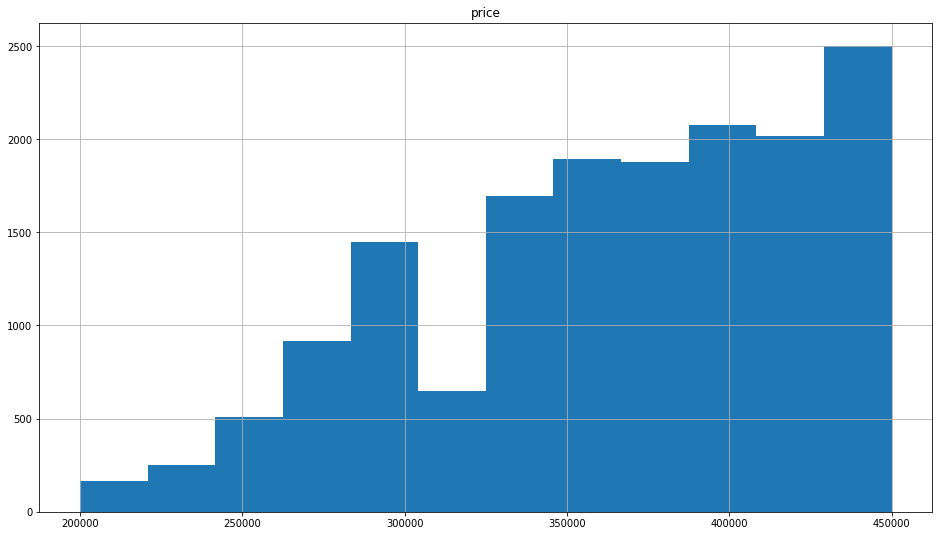

In [14]:
fig, ax = plt.subplots(figsize=(16,9))

london_df.hist('price', ax=ax, bins=12)

plt.show()

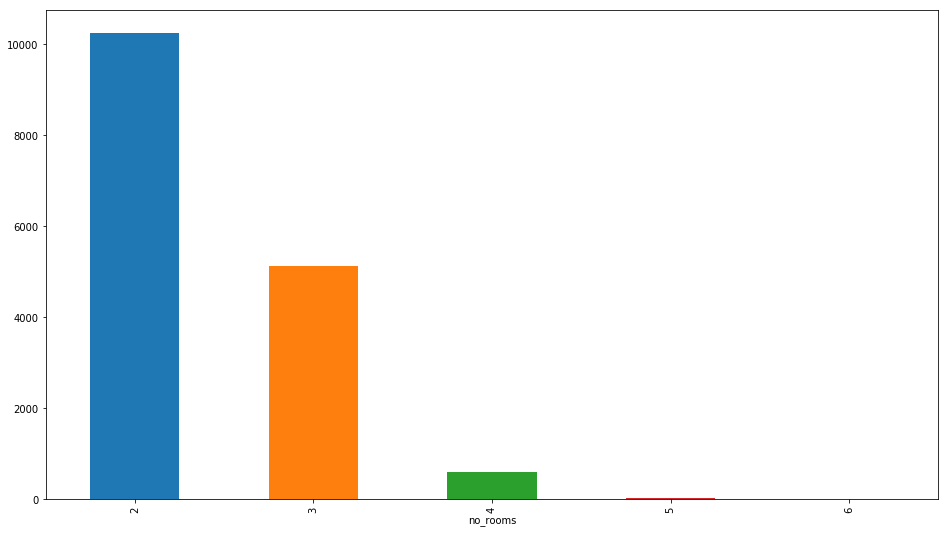

In [15]:
fig, ax = plt.subplots(figsize=(16,9))

london_df.groupby('no_rooms')['no_rooms'].count().plot.bar(ax=ax)

plt.show()

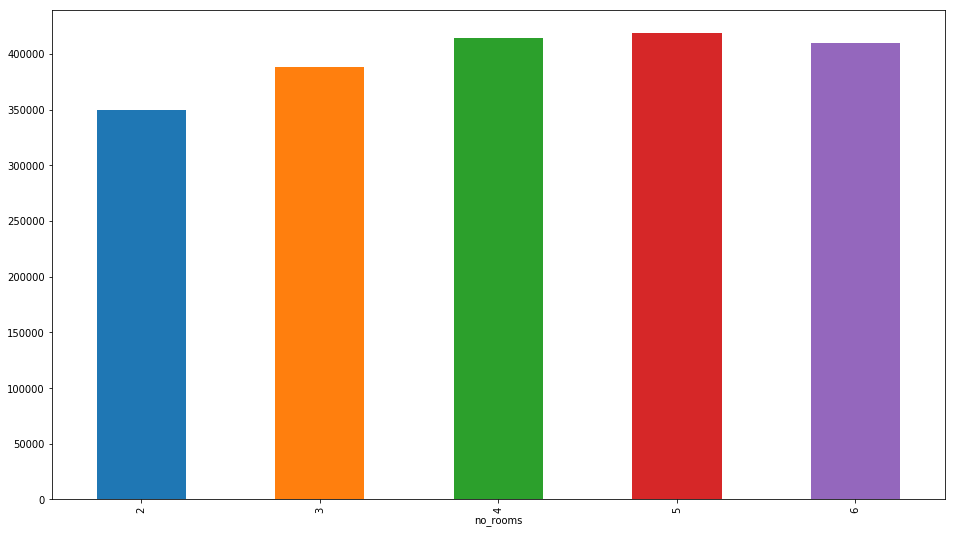

In [16]:
fig, ax = plt.subplots(figsize=(16,9))

london_df.groupby('no_rooms')['price'].mean().plot.bar(ax=ax)

plt.show()

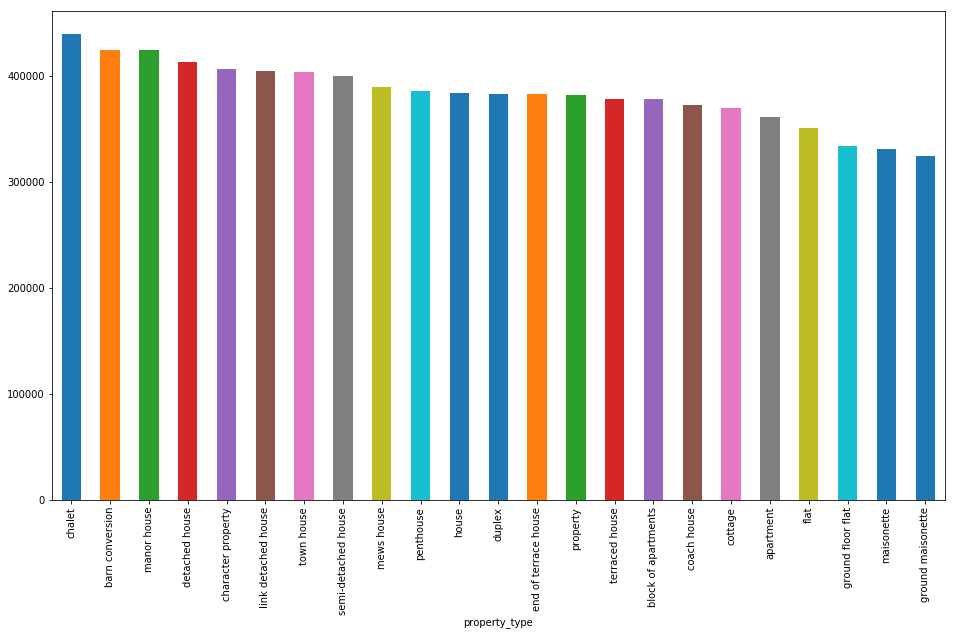

In [44]:
fig, ax = plt.subplots(figsize=(16,9))

london_df.groupby('property_type')['price'].mean().sort_values(ascending=False).plot.bar(ax=ax)

plt.show()

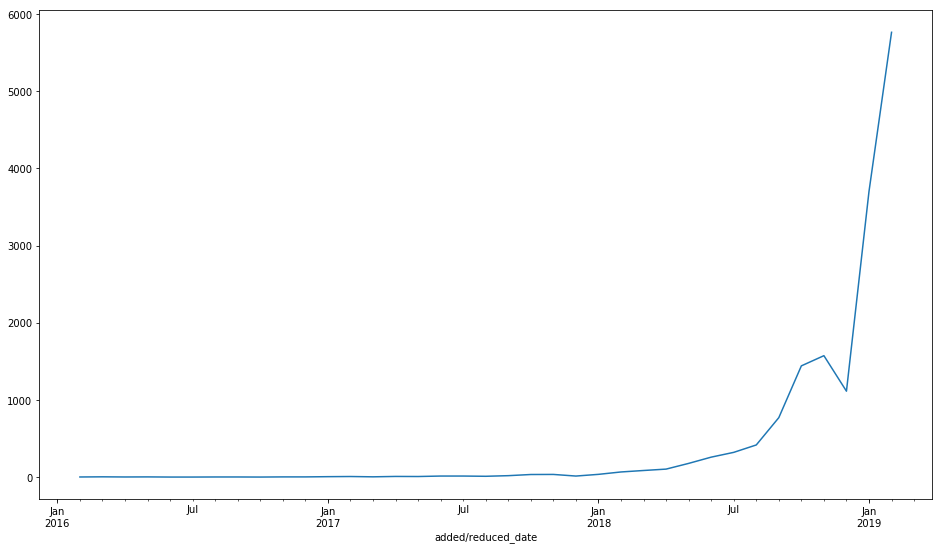

In [37]:
fig, ax = plt.subplots(figsize=(16,9))

london_df['added/reduced_date'] = pd.to_datetime(london_df['added/reduced_date'])
df_added = london_df.set_index('added/reduced_date').resample('M')['price'].count().plot(ax=ax)

plt.show()

In [85]:
map_df = gpd.read_file(district_shape_file)
map_df = map_df.set_index('postdist')

district_df = district_links.set_index('district')

map_df = pd.concat([map_df, district_df], axis=1)

mean_district_price = london_df.groupby('district')['price'].mean()
mean_district_price_df = pd.DataFrame(mean_district_price)
mean_district_price_df = mean_district_price_df.reindex(district_list, fill_value=mean_district_price_df['price'].max())

map_df = pd.concat([map_df, mean_district_price_df], axis=1)
map_df = map_df[np.isfinite(map_df['price'])]

map_df['no_properties/population'] = map_df['no_properties']/map_df['pccnt']
map_df['no_properties/population'] = map_df['no_properties/population'].fillna(0)

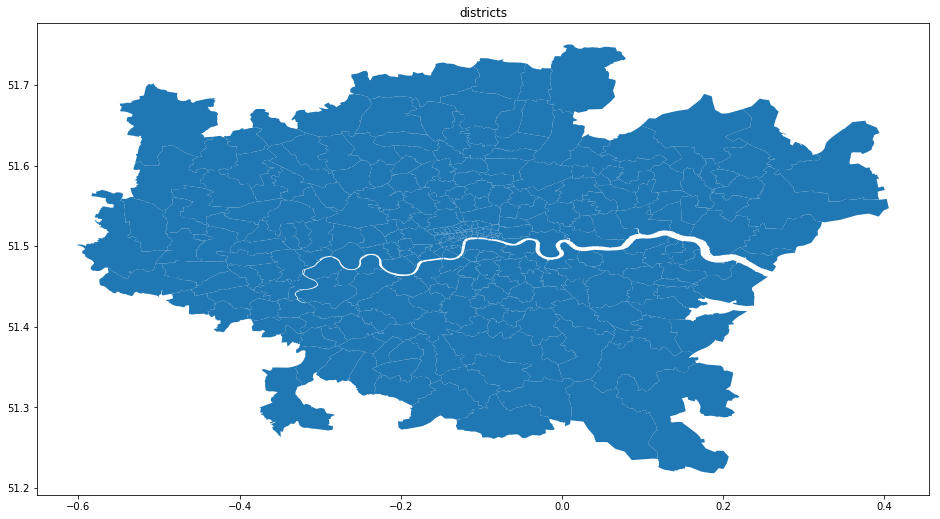

In [90]:
fig, ax = plt.subplots(figsize=(16,9))

map_df.plot(ax=ax)

ax.set(title='districts')

plt.show()

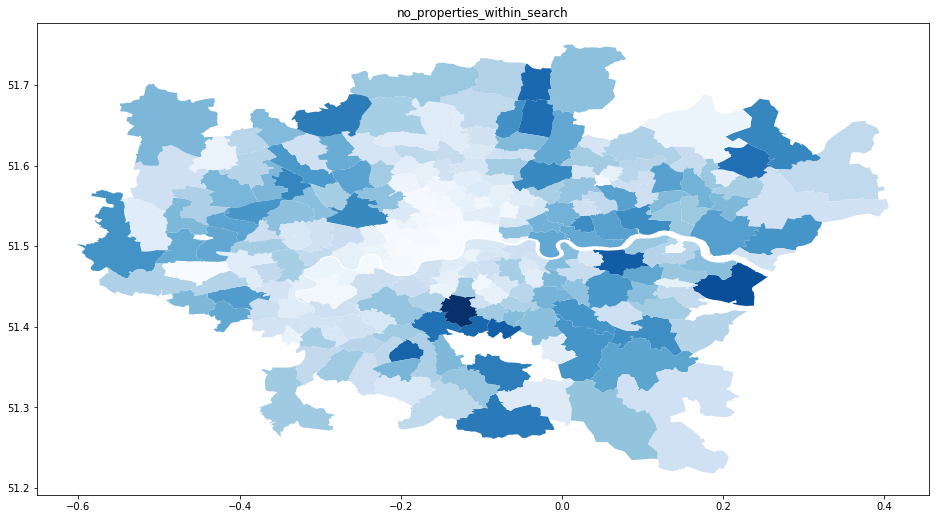

In [89]:
fig, ax = plt.subplots(figsize=(16,9))

map_df[map_df.index != 'CR0'].plot(column='no_properties', cmap='Blues', ax=ax)

ax.set(title='no_properties_within_search')

plt.show()

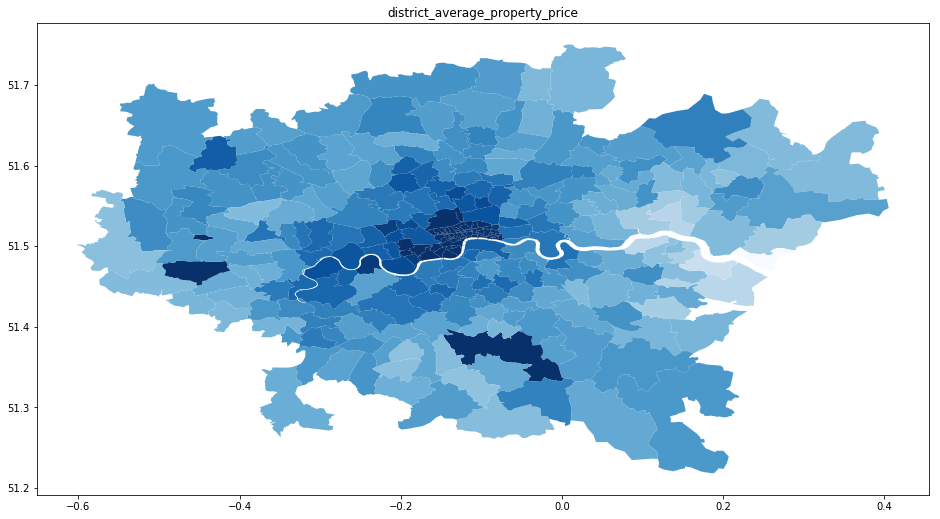

In [91]:
fig, ax = plt.subplots(figsize=(16,9))

map_df.plot(column='price', cmap='Blues', ax=ax)

ax.set(title='district_average_property_price')

plt.show()

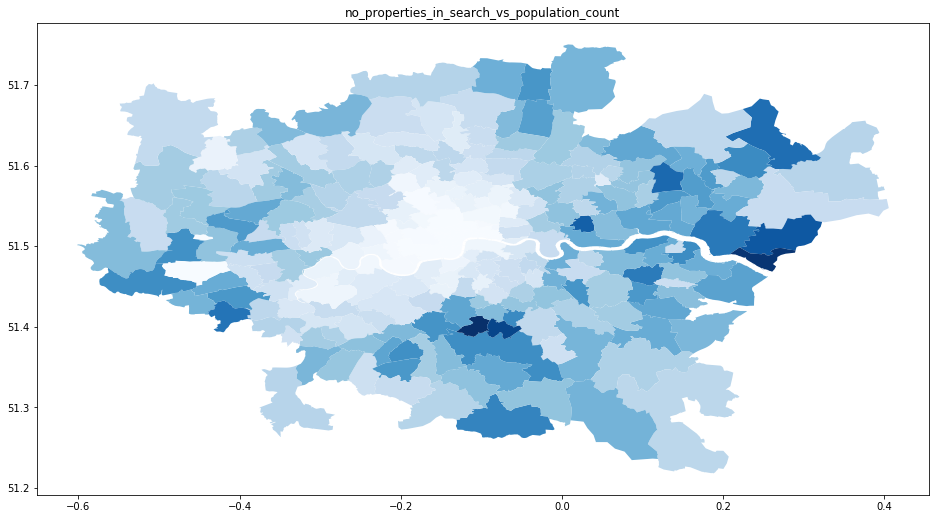

In [92]:
fig, ax = plt.subplots(figsize=(16,9))

map_df.plot(column='no_properties/population', cmap='Blues', ax=ax)

ax.set(title='no_properties_in_search_vs_population_count')

plt.show()

In [88]:
map_df.sort_values(by='no_properties/population', ascending=False)

,id,geom,distid,postarea,distnum,pccnt,anomcnt,refpc,x,y,sprawl,locale,geometry,no_properties,link,code,price,no_properties/population
district,,,,,,,,,,,,,,,,,,
CR7,438,SRID=27700;MULTIPOLYGON(((530152.535687331 167...,438.0,CR,7,581.0,3.0,CR77QB,531847.0,168431.0,London,Thornton Heath,POLYGON ((-0.1306662542408503 51.3936967619069...,184,https://www.rightmove.co.uk/property-for-sale/...,OUTCODE%5E529,353228.286517,0.316695
RM19,2036,SRID=27700;MULTIPOLYGON(((553466.427112962 179...,2036.0,RM,19,145.0,1.0,RM191RR,555906.0,178461.0,Purfleet,None,(POLYGON ((0.2091011690564324 51.4898576161776...,45,https://www.rightmove.co.uk/property-for-sale/...,OUTCODE%5E2197,258397.500000,0.310345
SE25,2159,SRID=27700;MULTIPOLYGON(((532816.39125318 1679...,2159.0,SE,25,661.0,1.0,SE255AJ,533910.0,168272.0,London,South Norwood,POLYGON ((-0.09233293679568312 51.394702108068...,192,https://www.rightmove.co.uk/property-for-sale/...,OUTCODE%5E2326,346850.823529,0.290469
RM15,2032,SRID=27700;MULTIPOLYGON(((555856.826982332 182...,2032.0,RM,15,534.0,0.0,RM155HE,558090.0,181336.0,South Ockendon,None,"POLYGON ((0.244962219329849 51.51888416316647,...",143,https://www.rightmove.co.uk/property-for-sale/...,OUTCODE%5E2193,327338.251748,0.267790
E13,651,SRID=27700;MULTIPOLYGON(((540340.322820255 183...,651.0,E,13,582.0,0.0,E130BE,540605.0,182956.0,London,Plaistow,POLYGON ((0.02209935483323225 51.5368882735124...,150,https://www.rightmove.co.uk/property-for-sale/...,OUTCODE%5E748,359027.176056,0.257732
RM6,2042,SRID=27700;MULTIPOLYGON(((546185.246634825 190...,2042.0,RM,6,526.0,0.0,RM65TX,547641.0,188561.0,London,Chadwell Heath,POLYGON ((0.1089964091582635 51.59340419394296...,130,https://www.rightmove.co.uk/property-for-sale/...,OUTCODE%5E2204,344285.317460,0.247148
CM14,396,SRID=27700;MULTIPOLYGON(((552529.375918822 195...,396.0,CM,14,653.0,1.0,CM144QP,558768.0,193598.0,Brentwood,None,(POLYGON ((0.2026441966425453 51.6357864368001...,157,https://www.rightmove.co.uk/property-for-sale/...,OUTCODE%5E487,344200.100671,0.240429
TW16,2544,SRID=27700;MULTIPOLYGON(((509392.659123559 171...,2544.0,TW,16,537.0,0.0,TW166PY,510148.0,169727.0,Sunbury,None,POLYGON ((-0.4278532742795984 51.4292524095355...,125,https://www.rightmove.co.uk/property-for-sale/...,OUTCODE%5E2720,345273.333333,0.232775
RM13,2030,SRID=27700;MULTIPOLYGON(((549896.018833986 181...,2030.0,RM,13,583.0,0.0,RM138ST,552177.0,183099.0,London,Rainham,(POLYGON ((0.1587280519455698 51.5122849964670...,133,https://www.rightmove.co.uk/property-for-sale/...,OUTCODE%5E2191,344349.593496,0.228130


In [7]:
london_df.groupby('district')['district'].count().sort_values(ascending=False)

district
SW16    252
DA1     214
SE18    201
SE25    197
CR7     190
RM3     186
EN8     182
EN3     181
SM1     176
CR4     173
CR2     171
WD6     167
SE9     156
NW10    155
EN1     153
HA1     153
BR1     153
E17     151
E13     151
CM14    151
BR2     150
BR5     149
IG11    147
RM15    145
UB5     140
HA3     140
SL3     139
TW13    138
CR3     138
RM13    134
       ... 
DA6      15
SW14     15
E1W      14
IG5      13
SW12     13
TW9      13
RM4      13
W6       12
SE11     12
NW11     12
W9       11
N6       10
SE24      7
NW8       7
N5        7
E8        6
DA18      6
SW6       6
TW10      6
NW5       5
W14       3
NW3       3
W2        3
W11       3
W10       3
SW13      3
SW10      2
IG4       2
EC2A      2
EC1V      1
Name: district, Length: 234, dtype: int64